# Challenge 3

In this challenge we will work on the `Orders` data set. In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

## Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Next, extract and import `Orders` dataset into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [3]:
orders = pd.read_csv('Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [5]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [6]:
Clients = orders[['CustomerID', 'Country', 'amount_spent']]
Clients.head()

,CustomerID,Country,amount_spent
0,17850,United Kingdom,15.30
1,17850,United Kingdom,20.34
2,17850,United Kingdom,22.00
3,17850,United Kingdom,20.34
4,17850,United Kingdom,20.34


In [7]:
Clients['Country'].nunique()

37

In [8]:
Clients['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [9]:
Clients['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [10]:
Clients['CustomerID'].nunique()

4339

In [11]:
print("The maximum of sales is: ", Clients['amount_spent'].max())

The maximum of sales is:  168469.6


In [12]:
print("the mean of sales is: ", Clients['amount_spent'].mean())

the mean of sales is:  22.39474850474768


In [13]:
Expercl = Clients.groupby(['CustomerID','Country']).agg({'amount_spent':sum}).reset_index()
print(Expercl.shape)
display(Expercl.head())

(4347, 3)


,CustomerID,Country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40


In [14]:
Experclpiv = Clients.pivot_table(index= ['CustomerID','Country'], values = ['amount_spent']) 
#por qué al pivotar la tabla, habiendo 4339 CustomerID, tiene 8 filas más que customerID?? que ocho filas son??

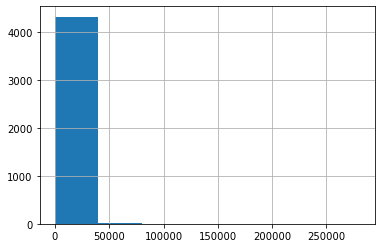

In [15]:
Expercl['amount_spent'].hist(bins=7);

In [16]:
print("The maximum of sales is: ", Expercl['amount_spent'].max())

The maximum of sales is:  280206.02


In [17]:
print("The mean of sales is: ", Expercl['amount_spent'].mean())

The mean of sales is:  2050.013320450888


In [18]:
Expercl.sort_values(by='amount_spent',ascending=False )



,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
...,...,...,...
4107,17956,United Kingdom,12.75
3023,16454,United Kingdom,6.90
1802,14792,United Kingdom,6.20
3226,16738,United Kingdom,3.75


In [19]:
print("0.95 quantile of arr : ", np.quantile(Expercl['amount_spent'], .95)) #para aplicar esta función, tiene que estar la columna rankeada??

0.95 quantile of arr :  5774.277999999996


In [20]:
print("Q2 quantile of arr : ", np.quantile(Expercl['amount_spent'], .75))

Q2 quantile of arr :  1661.195


In [21]:
def categorize_amount(x):
    if  (x >= 5840):
        return "VIP"
    elif ( (x<=5840) and (x>=1661) ):
        return "Preferred"
    else:
        return "other" 
    
categorize_amount(2000)
    

'Preferred'

In [22]:
Expercl['Category'] = Expercl['amount_spent'].apply(categorize_amount) 

In [23]:
Expercl.head()

,CustomerID,Country,amount_spent,Category
0,12346,United Kingdom,77183.60,VIP
1,12347,Iceland,4310.00,Preferred
2,12348,Finland,1797.24,Preferred
3,12349,Italy,1757.55,Preferred
4,12350,Norway,334.40,other


In [24]:
 Expercl['Category'].value_counts()

other        3259
Preferred     872
VIP           216
Name: Category, dtype: int64

In [25]:

Expercl.sort_values(by='amount_spent',ascending=False )


,CustomerID,Country,amount_spent,Category
1698,14646,Netherlands,280206.02,VIP
4210,18102,United Kingdom,259657.30,VIP
3737,17450,United Kingdom,194550.79,VIP
3017,16446,United Kingdom,168472.50,VIP
1888,14911,EIRE,143825.06,VIP
...,...,...,...,...
4107,17956,United Kingdom,12.75,other
3023,16454,United Kingdom,6.90,other
1802,14792,United Kingdom,6.20,other
3226,16738,United Kingdom,3.75,other


Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

## Q2: How to identify which country has the most VIP Customers?

In [28]:
Expercl['VIP'] = [Expercl['Category'] == 'VIP']





SyntaxError: invalid syntax (Temp/ipykernel_18696/3120376651.py, line 1)

In [32]:
Expercl_2 = Expercl[Expercl['Category']=='VIP']

In [33]:
 Expercl_2['Country'].value_counts()

United Kingdom     177
Germany             10
France               9
Switzerland          3
Spain                2
Japan                2
Portugal             2
EIRE                 2
Australia            1
Finland              1
Norway               1
Denmark              1
Cyprus               1
Singapore            1
Netherlands          1
Channel Islands      1
Sweden               1
Name: Country, dtype: int64

## Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [34]:
Expercl_3 = Expercl[(Expercl['Category'] == 'VIP') | (Expercl['Category'] == 'Preferred')]



In [35]:
 Expercl_3['Country'].value_counts()

United Kingdom     934
Germany             39
France              29
Belgium             11
Switzerland          9
Norway               7
Portugal             7
Spain                7
Finland              5
Italy                5
Japan                4
Channel Islands      4
Australia            4
Cyprus               3
Denmark              3
EIRE                 3
Sweden               2
Israel               2
Singapore            1
Lebanon              1
Poland               1
Iceland              1
Greece               1
Netherlands          1
Austria              1
Lithuania            1
Canada               1
Malta                1
Name: Country, dtype: int64